# Comparison between gradient descent, line search and conjugate gradient

In [395]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [10,8]


In [396]:
MAXIMUM_ITER = 1000
STOP_THRESHOLD = 0.00000001

default_X = np.array([-1, -1, -1, -1, 0.3,2]).reshape(2,3)
default_Y = np.array([-0.1,0.5,0.5]).reshape(3,1)

print(default_X)
default_W = np.array([0.5,0.5]).reshape(2,1)

[[-1.  -1.  -1. ]
 [-1.   0.3  2. ]]


In [397]:
def plot_w_development( res ):
    total_iters = len(res['errors'])
    weights = res['weights']
    opacities = np.linspace(0.1,1, total_iters)
    p = plt.subplot(4,1,1)

    for i in range(len(weights)):
        p.scatter( weights[i, 0], weights[i,1], alpha=opacities[i] )

    plt.xlabel('w_0(bias)')
    plt.ylabel('w_1') 
    p.set_title("Relationship between w_0(bias) and w_1")
    
    p = plt.subplot(4,1,2)
    p.set_title("Weight development")
    its = np.arange(0, total_iters);
    
    p.plot(its, weights[:, 0], label ="w_0" )
    p.plot(its, weights[:, 1], label ="w_1" )
    p.legend()
    plt.xlabel('iteration')
    plt.ylabel('w')
    
    p = plt.subplot(4,1,3)
    p.set_title("Error development")
    p.plot( its, res['errors'] )
    plt.xlabel('iteration')
    plt.ylabel('err')
    
    p = plt.subplot(4,1,4)
    
    no_samples = 100
    X = np.ones((2, no_samples)) * -1
    X[1,:] = np.linspace(-1.5,0.5, no_samples).reshape(1,no_samples)
    predicted_values = pred( X, res['final_weight'] )


    p.plot( X[1,:] , predicted_values[:, :1].flatten() )
    p.plot( default_X[1,:], default_Y, 'ro' )
    p.set_title("Prediction boundary")
    
    plt.tight_layout()
#     print(res["errors"])
    print("error: %.6f with %d iters" % ( res["errors"][-1], len(res["weights"])-1) )
    print("Final weight ")
    print(res["final_weight"])

In [398]:
def compute_err(x,y,w):
    A = pred(x,w) - Y
    return np.dot(A.T, A)[0][0] / (2*len(y))

def pred(x,w):
    return np.dot(x.T,w)

def compute_gradient(x,y,w):
    H = np.dot(x,x.T)
    return np.dot(H,w) - np.dot(x,y)


grd : stop early as no error improve
error: 0.049174 with 3 iters
Final weight 
[[-0.30687938]
 [ 0.36403444]]


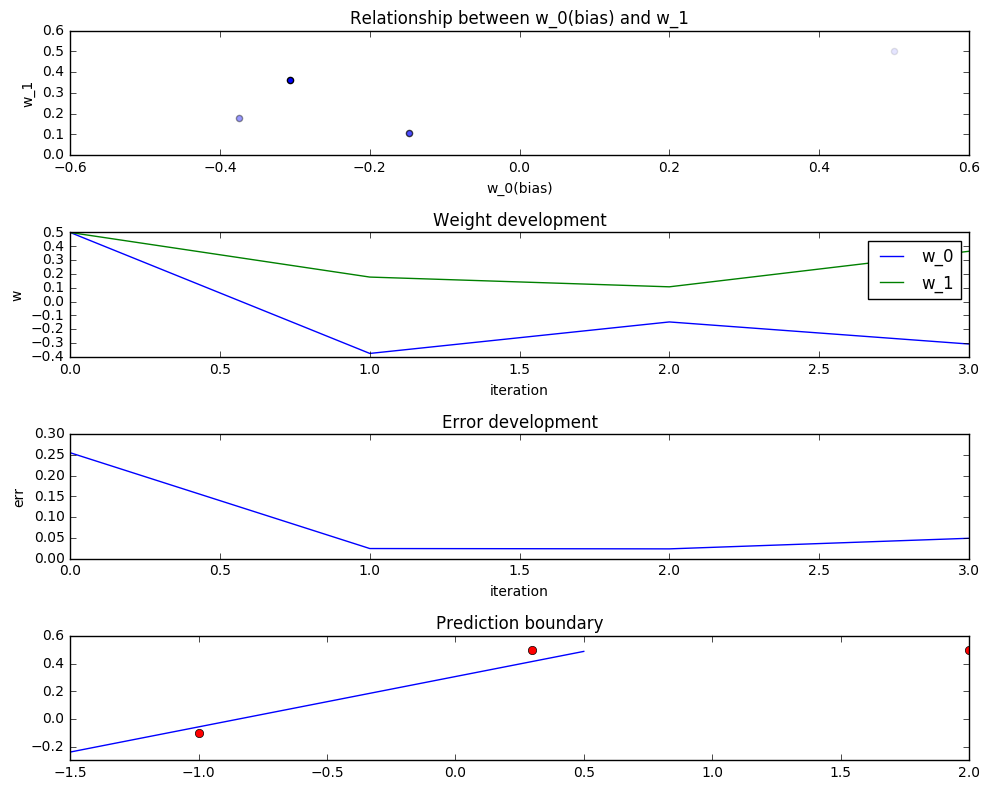

In [399]:

def grd(X,y,w, eta=0.5):
    
    it = 0
    w_basket = [w]
    errs = [compute_err(X,y,w)]
    
    while it < MAXIMUM_ITER:
        
        H =  np.dot(X,X.T)
        grad = np.dot(H,w) - np.dot(X,Y)

        w = w - eta*grad
        
#         w_basket.append(w[0][0])
        w_basket.append(w)
    
        err = compute_err(X,y,w)
        errs.append(err)
        if it > 0 and errs[it-1]-err < STOP_THRESHOLD :
            print("grd : stop early as no error improve")
            break

        it = it + 1
    return {"weights": np.array(w_basket).reshape(len(errs), len(w)), "final_weight": w_basket[-1], "errors": errs }

grd_result = grd(default_X,default_Y,default_W)
plot_w_development(grd_result)

line search : stop early as no error improve
error: 0.012769 with 6 iters
Final weight 
[[-0.2176728 ]
 [ 0.18998538]]


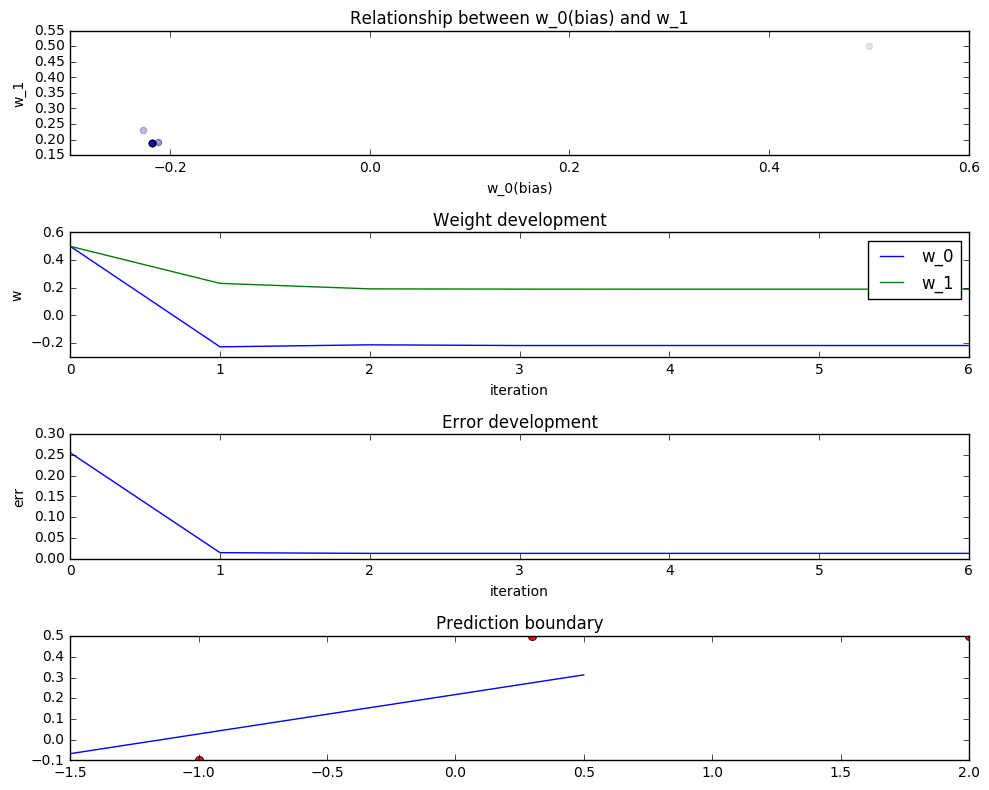

In [400]:
def line_search(X,y,w):
    it = 0
    w_basket = [w]
    errs = [compute_err(X,y,w)]
    
    while it < MAXIMUM_ITER:
        
        H =  np.dot(X,X.T)
        grad = np.dot(H,w) - np.dot(X,Y)

        a = np.dot(grad.T, grad)[0][0]
        b = np.dot( np.dot(grad.T, H), grad )[0][0]

        eta = a/b

        if b == 0 or a == 0:
            break
        
#         eta = / np.dot( np.dot(grad.T, H), grad )[0][0]
        w = w - eta*grad

        w_basket.append(w)
        
        err = compute_err(X,y,w)
        errs.append(err)
        if it > 0 and errs[it-1]-err < STOP_THRESHOLD :
            print("line search : stop early as no error improve")
            break

        it = it + 1
    return {"weights": np.array(w_basket).reshape(len(errs), len(w)), "final_weight": w_basket[-1], "errors": errs }
ls_result = line_search(default_X,default_Y,default_W)
plot_w_development(ls_result)

conjugate gradient : stop early as no error improve
error: 0.012769 with 7 iters
Final weight 
[[-0.21767302]
 [ 0.18998523]]


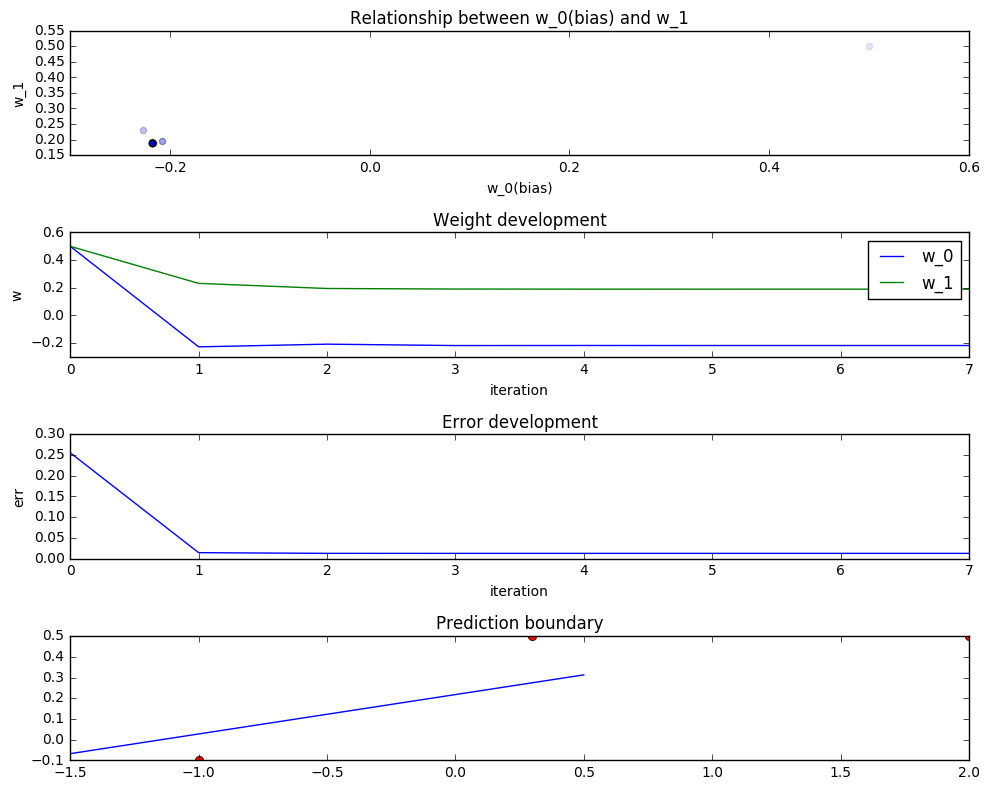

In [401]:
def conjugate_gradient(X,y,w):
    it = 0
    w_basket = [w]

    errs = [compute_err(X,y,w)]
    
    H = np.dot(X,X.T)

    
    g_t = [ compute_gradient(X,y,w) ]
    d_t = [ g_t[0] ]
    
    while it < MAXIMUM_ITER:

        grad = compute_gradient(X,y,w)


        a = np.dot( d_t[it].T, g_t[it] )[0][0]
        b = np.dot( np.dot(d_t[it].T, H), d_t[it] )[0][0]
        
        eta = -a/b
        
        w = w + eta*d_t[it]
        
        g_t.append(compute_gradient(X,y,w))
        
        c = np.dot( g_t[it+1].T, g_t[it+1] )[0][0]
        d = np.dot( g_t[it].T, g_t[it] )[0][0]

        beta = - c/d
        d_t.append(g_t[it+1] + beta*d_t[it])

        w_basket.append(w)
        
        err = compute_err(X,y,w)
        errs.append(err)
        if it > 0 and errs[it-1]-err < STOP_THRESHOLD :
            print("conjugate gradient : stop early as no error improve")
            break

        it = it + 1
    return {"weights": np.array(w_basket).reshape(len(errs), len(w)), "final_weight": w_basket[-1], "errors": errs }

conj_result = conjugate_gradient(default_X,default_Y,default_W)
plot_w_development(conj_result)